In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///hawaii.sqlite")


In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 
prev_year = dt.date(2017, 8, 23)

# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
# Perform a query to retrieve the data and precipitation scores
results = []


results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()
print(results)

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date','precipitation'])

# Sort the dataframe by date
df.set_index(df['date'], inplace=True)



[('2016-08-23', 0.0), ('2016-08-24', 0.08), ('2016-08-25', 0.08), ('2016-08-26', 0.0), ('2016-08-27', 0.0), ('2016-08-28', 0.01), ('2016-08-29', 0.0), ('2016-08-30', 0.0), ('2016-08-31', 0.13), ('2016-09-01', 0.0), ('2016-09-02', 0.0), ('2016-09-03', 0.0), ('2016-09-04', 0.03), ('2016-09-05', None), ('2016-09-06', None), ('2016-09-07', 0.05), ('2016-09-08', 0.0), ('2016-09-09', 0.03), ('2016-09-10', 0.0), ('2016-09-11', 0.05), ('2016-09-12', 0.0), ('2016-09-13', 0.02), ('2016-09-14', 1.32), ('2016-09-15', 0.42), ('2016-09-16', 0.06), ('2016-09-17', 0.05), ('2016-09-18', 0.0), ('2016-09-19', 0.0), ('2016-09-20', 0.0), ('2016-09-21', 0.0), ('2016-09-22', 0.02), ('2016-09-23', 0.0), ('2016-09-24', 0.0), ('2016-09-25', 0.0), ('2016-09-26', 0.06), ('2016-09-27', 0.02), ('2016-09-28', 0.0), ('2016-09-29', 0.0), ('2016-09-30', 0.0), ('2016-10-01', 0.0), ('2016-10-02', 0.0), ('2016-10-03', 0.0), ('2016-10-04', 0.0), ('2016-10-05', 0.0), ('2016-10-06', 0.0), ('2016-10-07', 0.0), ('2016-10-08', 

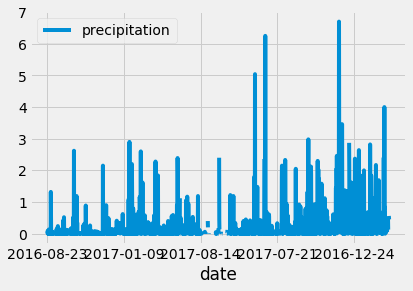

In [11]:
# Use Pandas Plotting with Matplotlib to plot the data
df.plot()


In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()


,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [13]:
# How many stations are available in this dataset?
session.query(func.count(Station.station)).all()


[(9)]

In [14]:
# What are the most active stations?
session.query(Measurement.station, func.count(Measurement.station)).\
	group_by(Measurement.station)
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()
# highest temperature recorded, and average temperature most active station?


[(54.0, 85.0, 71.66378066378067)]

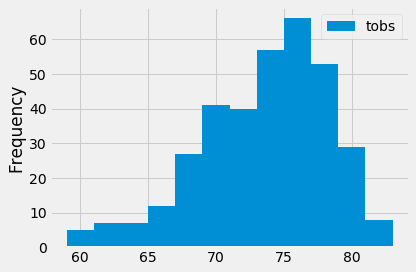

In [16]:
# Choose the station with the highest number of temperature observations.
results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()
df = pd.DataFrame(results, columns=['tobs'])

# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
df.plot.hist(bins=12)
plt.tight_layout()


In [17]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates


# Challenge

In [18]:
def calc_temps(month):
    
    results = session.query(Measurement.tobs, Station.station).\
        filter(func.extract('month',Measurement.date)== month)
    df= pd.DataFrame(results,columns=['Date','Station'])
    return df.describe()

In [19]:
#june
calc_temps('06')

,Date
count,15300.000000
mean,74.944118
std,3.256565
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


In [20]:
from sqlalchemy import extract  

session.query(Measurement.date).filter(extract('month', Measurement.date)==6).all()

[('2010-06-01'),
 ('2010-06-02'),
 ('2010-06-03'),
 ('2010-06-04'),
 ('2010-06-05'),
 ('2010-06-06'),
 ('2010-06-07'),
 ('2010-06-08'),
 ('2010-06-09'),
 ('2010-06-10'),
 ('2010-06-11'),
 ('2010-06-12'),
 ('2010-06-13'),
 ('2010-06-14'),
 ('2010-06-15'),
 ('2010-06-16'),
 ('2010-06-17'),
 ('2010-06-18'),
 ('2010-06-19'),
 ('2010-06-20'),
 ('2010-06-21'),
 ('2010-06-22'),
 ('2010-06-23'),
 ('2010-06-24'),
 ('2010-06-25'),
 ('2010-06-26'),
 ('2010-06-27'),
 ('2010-06-28'),
 ('2010-06-29'),
 ('2010-06-30'),
 ('2011-06-01'),
 ('2011-06-02'),
 ('2011-06-03'),
 ('2011-06-04'),
 ('2011-06-05'),
 ('2011-06-06'),
 ('2011-06-07'),
 ('2011-06-08'),
 ('2011-06-09'),
 ('2011-06-10'),
 ('2011-06-11'),
 ('2011-06-12'),
 ('2011-06-13'),
 ('2011-06-14'),
 ('2011-06-15'),
 ('2011-06-17'),
 ('2011-06-18'),
 ('2011-06-19'),
 ('2011-06-20'),
 ('2011-06-21'),
 ('2011-06-24'),
 ('2011-06-25'),
 ('2011-06-26'),
 ('2011-06-27'),
 ('2011-06-28'),
 ('2011-06-29'),
 ('2012-06-01'),
 ('2012-06-02'),
 ('2012-06-03'

In [21]:

# Perform a query to retrieve the data and precipitation scores
results = []

results = session.query(Measurement.date, Measurement.tobs)
results = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)==6).all()


# Save the query results as a Pandas DataFrame and set the index to the date column
june_df = pd.DataFrame(results, columns=['date','temperature'])

# Sort the dataframe by date
june_df.set_index(june_df['date'], inplace=True)
june_df

,date,temperature
date,,
2010-06-01,2010-06-01,78.0
2010-06-02,2010-06-02,76.0
2010-06-03,2010-06-03,78.0
2010-06-04,2010-06-04,76.0
2010-06-05,2010-06-05,77.0
...,...,...
2017-06-26,2017-06-26,79.0
2017-06-27,2017-06-27,74.0
2017-06-28,2017-06-28,74.0


In [22]:
june_df.describe()

,temperature
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


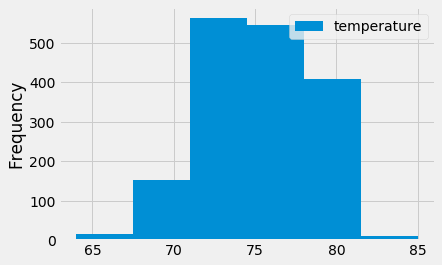

In [23]:
#temperatures in june 

june_df.plot.hist(bins=6)
plt.show()

In [24]:
#december
calc_temps('12')

,Date
count,13653.000000
mean,71.041529
std,3.744822
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [25]:

session.query(Measurement.date).filter(extract('month', Measurement.date)==12).all()

[('2010-12-01'),
 ('2010-12-03'),
 ('2010-12-04'),
 ('2010-12-06'),
 ('2010-12-07'),
 ('2010-12-08'),
 ('2010-12-09'),
 ('2010-12-10'),
 ('2010-12-11'),
 ('2010-12-12'),
 ('2010-12-13'),
 ('2010-12-14'),
 ('2010-12-15'),
 ('2010-12-16'),
 ('2010-12-17'),
 ('2010-12-18'),
 ('2010-12-19'),
 ('2010-12-23'),
 ('2010-12-24'),
 ('2010-12-26'),
 ('2010-12-27'),
 ('2010-12-28'),
 ('2010-12-29'),
 ('2010-12-30'),
 ('2010-12-31'),
 ('2011-12-01'),
 ('2011-12-02'),
 ('2011-12-03'),
 ('2011-12-04'),
 ('2011-12-05'),
 ('2011-12-06'),
 ('2011-12-07'),
 ('2011-12-08'),
 ('2011-12-09'),
 ('2011-12-10'),
 ('2011-12-11'),
 ('2011-12-12'),
 ('2011-12-13'),
 ('2011-12-14'),
 ('2011-12-15'),
 ('2011-12-16'),
 ('2011-12-17'),
 ('2011-12-18'),
 ('2011-12-19'),
 ('2011-12-20'),
 ('2011-12-21'),
 ('2011-12-22'),
 ('2011-12-23'),
 ('2011-12-24'),
 ('2011-12-25'),
 ('2011-12-26'),
 ('2011-12-27'),
 ('2011-12-28'),
 ('2011-12-29'),
 ('2011-12-30'),
 ('2011-12-31'),
 ('2012-12-01'),
 ('2012-12-02'),
 ('2012-12-03'

In [26]:

# Perform a query to retrieve the data and precipitation scores
results = []

results = session.query(Measurement.date, Measurement.tobs)
results = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)==12).all()


# Save the query results as a Pandas DataFrame and set the index to the date column
december_df = pd.DataFrame(results, columns=['date','temperature'])

# Sort the dataframe by date
december_df.set_index(december_df['date'], inplace=True)
december_df

,date,temperature
date,,
2010-12-01,2010-12-01,76.0
2010-12-03,2010-12-03,74.0
2010-12-04,2010-12-04,74.0
2010-12-06,2010-12-06,64.0
2010-12-07,2010-12-07,64.0
...,...,...
2016-12-27,2016-12-27,71.0
2016-12-28,2016-12-28,71.0
2016-12-29,2016-12-29,69.0


In [27]:
december_df.describe()

,temperature
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


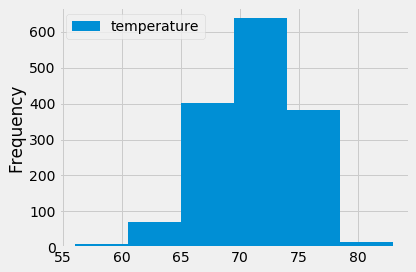

In [28]:
#temperatures in december 

december_df.plot.hist(bins=6)
plt.tight_layout()

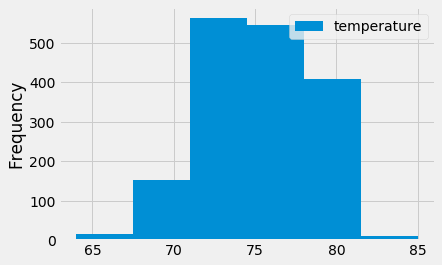

In [29]:
june_df.plot.hist(bins=6)
plt.show()